In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K
import tensorflow as tf
# Train-Test
from sklearn.model_selection import train_test_split
# Scaling data
from sklearn.preprocessing import StandardScaler
# Classification Report
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    precision_score,
    recall_score,
    )

In [ ]:
df = pd.read_csv('5min_normalizado.csv')
X = df[['rr_mean_boxcox','sdrr_boxcox','sdsd_boxcox','dam_boxcox','vlf_boxcox','lf_boxcox','lfhf_boxcox','sd2_boxcox','sd12_boxcox',
        'lmax_boxcox','captura_boxcox','determinismo_boxcox','rec_yj']]
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
y = df['etiqueta']

In [ ]:
X

In [ ]:
y_encoded = tf.keras.utils.to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_encoded, test_size = 0.2)

In [ ]:
len(X_train)

326

In [ ]:
len(X_test)

82

In [ ]:
df['etiqueta'].value_counts()

,count
etiqueta,
2,150
1,150
0,108


In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits= 5, shuffle= True, random_state = 42)
train_acc_per_fold = []
acc_per_fold = []
train_loss_per_fold = []
loss_per_fold = []
fold_no = 1

for train, test in kfold.split(X_train, y_train):
  initial_learning_rate = 0.04
  final_learning_rate = 0.0005
  epochs = 50
  learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/epochs)
  steps_per_epoch = int(len(X_train)/32)

  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                  initial_learning_rate=initial_learning_rate,
                  decay_steps=steps_per_epoch,
                  decay_rate=learning_rate_decay_factor,
                  staircase=True)


  model = Sequential()
  model.add(Dense(20, input_shape = (13,), activation = 'relu',name= 'oculta_1'))
  model.add(Dense(3, activation = 'softmax',name= 'salida'))
  model.compile(
      RMSprop(learning_rate = lr_schedule),
      'categorical_crossentropy',
      metrics = ['accuracy']
  )

  print('---------------------------------------------------')
  print(f'entrenamiento para pliegue numero: {fold_no}')

  history = model.fit(X_train[train], y_train[train],
                      batch_size = 32,
                      epochs = 200,
                      verbose = 2
                      )
  #metricas

  scores = model.evaluate(X_train[train], y_train[train], verbose = 0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  train_acc_per_fold.append(scores[1] * 100)
  train_loss_per_fold.append(scores[0])

  scores = model.evaluate(X_train[test], y_train[test], verbose = 0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

---------------------------------------------------
entrenamiento para pliegue numero: 1
Epoch 1/200
9/9 - 1s - loss: 0.9747 - accuracy: 0.5385 - 532ms/epoch - 59ms/step
Epoch 2/200
9/9 - 0s - loss: 0.8314 - accuracy: 0.6077 - 26ms/epoch - 3ms/step
Epoch 3/200
9/9 - 0s - loss: 0.7262 - accuracy: 0.6462 - 20ms/epoch - 2ms/step
Epoch 4/200
9/9 - 0s - loss: 0.6892 - accuracy: 0.6692 - 19ms/epoch - 2ms/step
Epoch 5/200
9/9 - 0s - loss: 0.6110 - accuracy: 0.7192 - 18ms/epoch - 2ms/step
Epoch 6/200
9/9 - 0s - loss: 0.6179 - accuracy: 0.7077 - 20ms/epoch - 2ms/step
Epoch 7/200
9/9 - 0s - loss: 0.5346 - accuracy: 0.7692 - 19ms/epoch - 2ms/step
Epoch 8/200
9/9 - 0s - loss: 0.5335 - accuracy: 0.7462 - 18ms/epoch - 2ms/step
Epoch 9/200
9/9 - 0s - loss: 0.5332 - accuracy: 0.7808 - 23ms/epoch - 3ms/step
Epoch 10/200
9/9 - 0s - loss: 0.4943 - accuracy: 0.7769 - 18ms/epoch - 2ms/step
Epoch 11/200
9/9 - 0s - loss: 0.4920 - accuracy: 0.7769 - 17ms/epoch - 2ms/step
Epoch 12/200
9/9 - 0s - loss: 0.4536 -

In [ ]:
# == Provide average scores ==
print('TRAIN SCORES')
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(train_acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {train_loss_per_fold[i]} - Accuracy: {train_acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(train_acc_per_fold)}')
print(f'> Loss: {np.mean(train_loss_per_fold)}')
print('------------------------------------------------------------------------')

# == Provide average scores ==
print('TEST SCORES')
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)}')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

TRAIN SCORES
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.29980558156967163 - Accuracy: 87.69230842590332%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.3002948462963104 - Accuracy: 89.27202820777893%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.2769668698310852 - Accuracy: 91.5708839893341%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.25963321328163147 - Accuracy: 90.42145609855652%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.2790350019931793 - Accuracy: 88.12260627746582%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 89.41585659980774
> Loss: 0.2831471025943756
--------------------------------------

In [ ]:
def create_model():
    initial_learning_rate = 0.04
    final_learning_rate = 0.0005
    epochs = 50
    learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/epochs)
    steps_per_epoch = int(len(X_train)/32)

    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                    initial_learning_rate=initial_learning_rate,
                    decay_steps=steps_per_epoch,
                    decay_rate=learning_rate_decay_factor,
                    staircase=True)


    model = Sequential()
    model.add(Dense(20, input_shape = (13,), activation = 'relu',name= 'oculta_1'))
    model.add(Dense(3, activation = 'softmax',name= 'salida'))
    model.compile(
        RMSprop(learning_rate = lr_schedule),
        'categorical_crossentropy',
        metrics = ['accuracy']
    )

    return model

In [ ]:
model = create_model()
model.summary()
MLP = model.fit(X_train, y_train, validation_split=0.20 ,epochs = 200, verbose=2)
train_loss,train_score = model.evaluate(X_train, y_train)
test_loss, test_score = model.evaluate(X_test, y_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 oculta_1 (Dense)            (None, 20)                280       
                                                                 
 salida (Dense)              (None, 3)                 63        
                                                                 
Total params: 343 (1.34 KB)
Trainable params: 343 (1.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
9/9 - 0s - loss: 1.1309 - accuracy: 0.5038 - val_loss: 1.0942 - val_accuracy: 0.5303 - 471ms/epoch - 52ms/step
Epoch 2/200
9/9 - 0s - loss: 0.7499 - accuracy: 0.6077 - val_loss: 0.8800 - val_accuracy: 0.5909 - 35ms/epoch - 4ms/step
Epoch 3/200
9/9 - 0s - loss: 0.7001 - accuracy: 0.6308 - val_loss: 1.0437 - val_accuracy: 0.4242 - 46ms/epoch - 5ms/step
Epoch 4/200
9/9 - 0s - loss: 0.6910 - accuracy: 0.6154 

In [ ]:
print("train loss: {:.2f}, accuracy score: {:.2f}%".format(train_loss,train_score*100))
print("test loss: {:.2f}, accuracy score: {:.2f}%".format(test_loss,test_score*100))

train loss: 0.43, accuracy score: 83.13%
test loss: 0.73, accuracy score: 74.39%


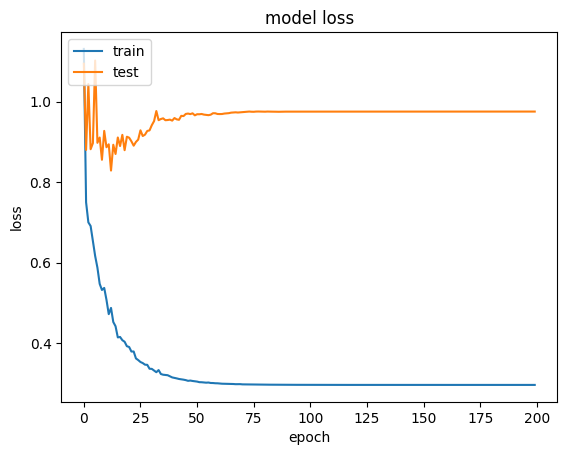

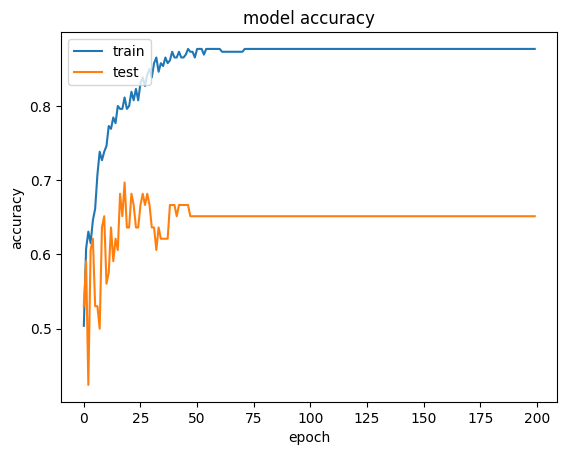

In [ ]:
# summarize history for loss
plt.plot(MLP.history['loss'])
plt.plot(MLP.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(MLP.history['accuracy'])
plt.plot(MLP.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

3/3 [==============================] - 0s 2ms/step
exactitud :74.39 %
precision :74.10 %
puntaje f1 :74.09 %


<Axes: >

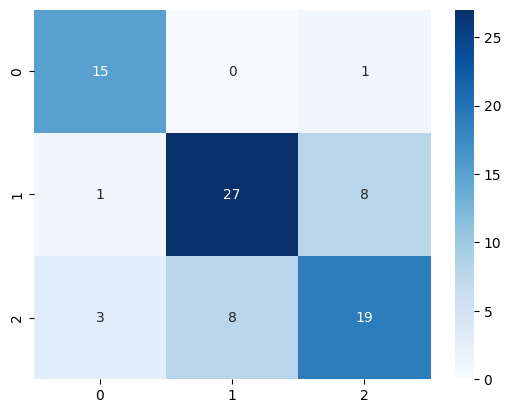

In [ ]:
y_pred_class = np.argmax(model.predict(X_test), axis=-1)
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_class, y_pred_class)
exactitud = accuracy_score(y_test_class,y_pred_class)
precision = precision_score(y_test_class,y_pred_class,average = 'weighted')
f1 = f1_score(y_test_class,y_pred_class,average = 'weighted')
print('exactitud :{:.2f} %'.format(exactitud*100))
print('precision :{:.2f} %'.format(precision*100))
print('puntaje f1 :{:.2f} %'.format(f1*100))
sns.heatmap(cm, annot = True, cmap='Blues', fmt='d')

In [ ]:
model.save('MLP_5min_model')